## Import the libraries

In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [96]:
df = pd.read_csv('housing.csv')

df.head()

## Preprocessing

In [97]:
df.shape

(20640, 10)

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Ocean Proximity column is the only object datatype column in the dataset . We will encode the value.

In [99]:
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [100]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Since the datasett is quite large we can drop those records for our requirement.

In [101]:
df.dropna(inplace=True)

In [102]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [103]:
df.shape

(20433, 10)

## Encoding

In [104]:
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: count, dtype: int64

In [105]:
df['ocean_proximity']=df['ocean_proximity'].map({"<1H OCEAN":0,"INLAND":1,"NEAR OCEAN":2,"NEAR BAY":3,"ISLAND":4})


In [106]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3


In [107]:
df['ocean_proximity'].value_counts()

ocean_proximity
0    9034
1    6496
2    2628
3    2270
4       5
Name: count, dtype: int64

## Train Test Split

In [108]:
X = df.drop('median_house_value',axis=1)
Y = df['median_house_value']

In [109]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=42)


In [110]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)


(15324, 9)
(5109, 9)
(15324,)
(5109,)


## Scaling the data 

In [111]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [112]:
X_train_scaled  = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [113]:
X_train_scaled

array([[0.54048583, 0.30393199, 0.19607843, ..., 0.31540865, 0.08351609,
        0.25      ],
       [0.74797571, 0.01806589, 0.33333333, ..., 0.09044565, 0.13494986,
        0.        ],
       [0.61032389, 0.08607864, 0.50980392, ..., 0.05426739, 0.11434325,
        1.        ],
       ...,
       [0.60020243, 0.15621679, 0.80392157, ..., 0.05936524, 0.1792458 ,
        0.        ],
       [0.23380567, 0.53453773, 0.21568627, ..., 0.17365565, 0.33020234,
        0.75      ],
       [0.19433198, 0.55154091, 1.        , ..., 0.10623253, 0.23403125,
        0.75      ]])

## Model Training and Architecture

In [114]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.callbacks import EarlyStopping

In [115]:
model = Sequential([
    #input layer
    Dense(1000,input_shape=(X_train_scaled.shape[1],),activation='relu'),
    # Hidden layer 1
    Dense(500,activation='relu'),
    #Hidden layer 2
    Dense(250,activation='relu'),
    #Hidden layer 3
    Dense(250,activation='relu'),
    #Output layer
    Dense(1,activation='linear')
])


/home/ratnesh/Machine Learning/Housing/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [116]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                │ (None, 1000)           │        10,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 500)            │       500,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 250)            │       125,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 250)            │        62,750 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 1)              │           251 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 698,751 (2.67 MB)

 Trainable params: 698,751 (2.67 MB)

 Non-trainable params: 0 (0.00 B)

In [117]:
model.compile(optimizer='rmsprop',loss='mse',metrics=['mae'])
es = EarlyStopping(monitor='val_loss',mode='min',patience=50,restore_best_weights=True)


In [118]:
history = model.fit(X_train_scaled,Y_train,
                    validation_data=(X_test_scaled,Y_test),
                    callbacks=[es],
                    epochs=50,
                    batch_size=50,
                    verbose=1)


Epoch 1/50


307/307 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - loss: 29610846208.0000 - mae: 134782.5781 - val_loss: 8303023104.0000 - val_mae: 73215.8438
Epoch 2/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 6803931136.0000 - mae: 63375.9531 - val_loss: 5760778240.0000 - val_mae: 55537.2539
Epoch 3/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 5713424384.0000 - mae: 55138.6445 - val_loss: 5434959872.0000 - val_mae: 52816.4219
Epoch 4/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - loss: 5529388544.0000 - mae: 53721.3828 - val_loss: 5085223936.0000 - val_mae: 51861.4180
Epoch 5/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - loss: 5047597568.0000 - mae: 51430.3281 - val_loss: 4758649344.0000 - val_mae: 50134.6562
Epoch 6/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 4850636800.0000 - mae: 49670.3516 - val_loss: 4814242304.0000 - val_mae: 52554.0156
Epoch 7/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - loss: 4769833472.0000 - mae: 48871.4336 - val_loss: 4491887616.0000 - val_mae: 49210

## Models

In [119]:
y_pred = model.predict(X_test_scaled)

160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [120]:
from sklearn.metrics import r2_score,mean_squared_error,mean_squared_log_error,mean_absolute_error

print("mae :" , mean_absolute_error(Y_test,y_pred))
print("mse :" , mean_squared_error(Y_test,y_pred))
print("mean squared log error :" , mean_squared_log_error(Y_test,y_pred))
print("R2 score :" , r2_score(Y_test,y_pred))

mae : 41195.30386863256
mse : 3481756757.3761163
mean squared log error : 0.0852246856586127
R2 score : 0.7426416107803497


In [121]:
training_loss = history.history['loss']

validation_loss = history.history['val_loss']

epochs = range(1,len(training_loss)+1)

In [122]:
epochs

range(1, 51)

Plotting the training and validation loss

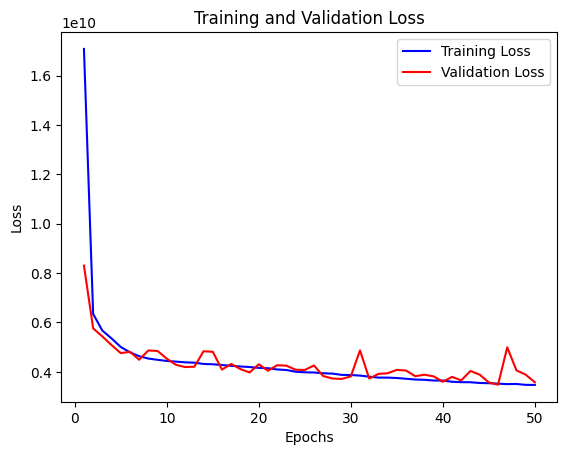

In [123]:
plt.plot(epochs,training_loss,'b',label="Training Loss")
plt.plot(epochs,validation_loss,'r',label="Validation Loss")

# label the plot

plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

In [124]:
def pred(longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity):
    features  = np.array([longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity])
    features_scaled = scaler.fit_transform([features])
    result = model.predict(features_scaled).reshape(1,-1)
    return result[0]

In [125]:
longitude = -122.2300
latitude  = 37.8800
housing_median_age  = 41.0000
total_rooms        = 880.0000
total_bedrooms   =  129.0000
population     = 322.0000
households          =    126.0000
median_income       =      8.3252
ocean_proximity       =     3.0000

price = pred(longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


In [126]:
price

array([568043.9], dtype=float32)

In [127]:
df.iloc[0]

longitude               -122.2300
latitude                  37.8800
housing_median_age        41.0000
total_rooms              880.0000
total_bedrooms           129.0000
population               322.0000
households               126.0000
median_income              8.3252
median_house_value    452600.0000
ocean_proximity            3.0000
Name: 0, dtype: float64

The prediction is not great as the original prce of the house is 568043.9 and the predicted value is 250266.03 , which is not so accurate. We need to fine tune the model.

## Saving the model

In [131]:
model.save("ANN_model_House_pred.keras")

import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))

In [132]:
import sklearn
import tensorflow
import keras

In [134]:
print("sklearn version :", sklearn.__version__)
print("Tensorflow version :", tensorflow.__version__)
print("Keras version :", keras.__version__)

sklearn version : 1.5.2
Tensorflow version : 2.18.0
Keras version : 3.6.0
